# Statistical Models: Time Series Forecasting

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Statistical Model Types for Forecasting</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_output_1.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_2.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/02_output_3.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [ ]:
#!

import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df_passengers = pd.read_csv('../data/airline-passengers.csv', parse_dates=["Month"], index_col="Month")
df_passengers = df_passengers.asfreq('MS')
df_passengers

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


## Create DataFrame for storing forecasts

In [ ]:
horizon = 48 # The next 4 years (12 months x 4 years) #!
date_end_raw = df_passengers.index[-1]
date_range = pd.date_range(start=date_end_raw, periods=horizon + 1, freq='MS')
date_range = date_range[1:]
df_forecast_base = pd.DataFrame(index=date_range)
df_forecast_base['Passengers'] = np.nan
df_forecast_base

,Passengers
1961-01-01,NaN
1961-02-01,NaN
...,...
1964-11-01,NaN
1964-12-01,NaN


## Prepare Historical Data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

## Models of ARIMA Components

### Autoregression (AR)


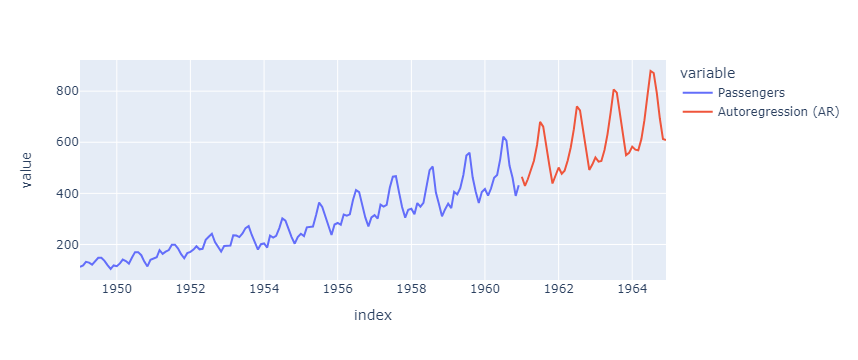

### Moving Average (MA)

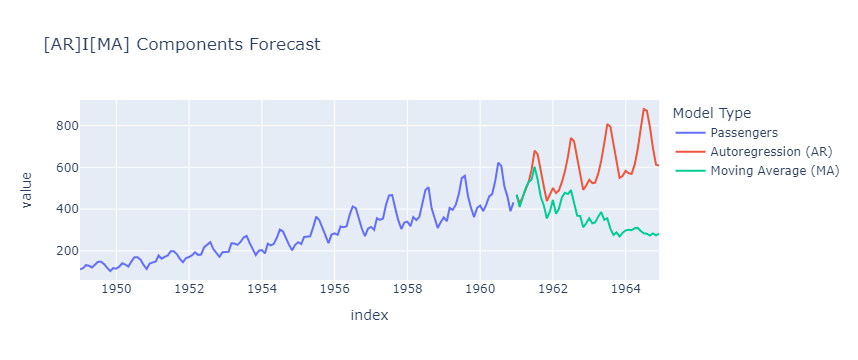

In [ ]:
from statsmodels.tsa.arima.model import ARIMA #!

def ma_forecast(data, order, horizon):
    model = ARIMA(data, order=(0, 0, order))
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data)+horizon-1)
    return forecast

df_forecast_arima_components['Moving Average (MA)'] = ma_forecast(data, horizon, horizon)

fig = pd.concat([df_passengers, df_forecast_arima_components]).plot(title='[AR]I[MA] Components Forecast')
fig = fig.update_layout(legend_title_text='Model Type')
fig

## ARIMA & SARIMA

### ARIMA

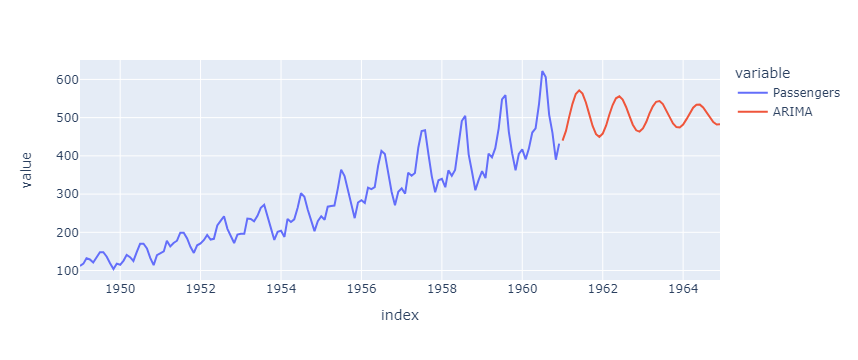

In [ ]:
def arima_forecast(data, order, horizon): #!
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data)+horizon-1)
    return forecast

df_forecast_arima = df_forecast_base.copy()
df_forecast_arima['ARIMA'] = arima_forecast(data, order=(2,1,2), horizon=horizon)

pd.concat([df_passengers, df_forecast_arima]).plot()

### Seasonal ARIMA (SARIMA)

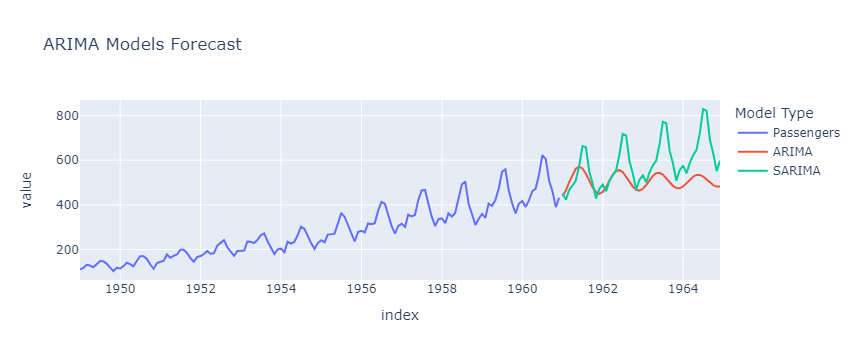

In [ ]:
def sarima_forecast(data, order, seasonal_order, horizon): #!
    model = ARIMA(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data)+horizon-1)
    return forecast

df_forecast_arima['SARIMA'] = sarima_forecast(data, (0, 1, 2), (1, 1, 2, 12), horizon)

fig = pd.concat([df_passengers, df_forecast_arima]).plot(title='ARIMA Models Forecast')
fig = fig.update_layout(legend_title_text='Model Type')
fig

## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing #!

### Simple Exponential Smoothing

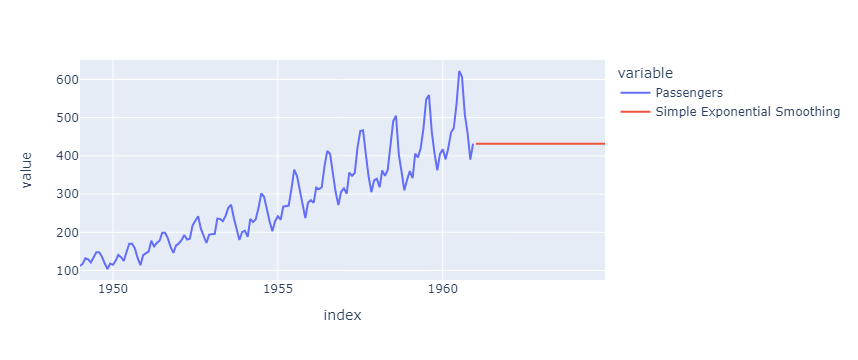

In [ ]:
def simple_exp_smoothing_forecast(data, horizon): #!
    model = SimpleExpSmoothing(data)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=horizon)
    return forecast

df_forecast_exponential = df_forecast_base.copy()
df_forecast_exponential['Simple Exponential Smoothing'] = simple_exp_smoothing_forecast(data, horizon)

pd.concat([df_passengers, df_forecast_exponential]).plot()

### Holt's Exponential Smoothing

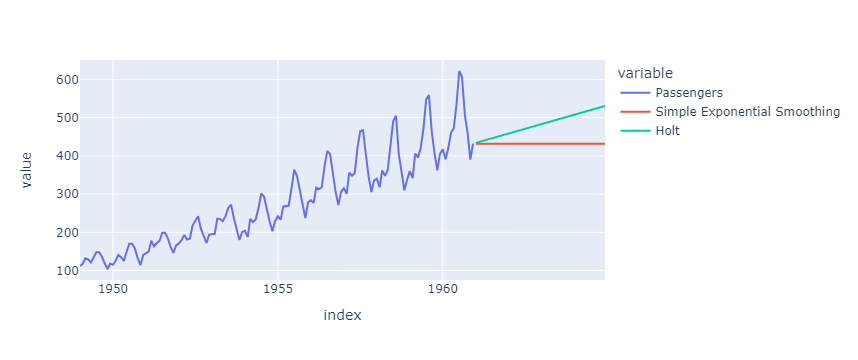

In [ ]:
def holt_forecast(data, horizon): #!
    model = ExponentialSmoothing(data, trend='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=horizon)
    return forecast

df_forecast_exponential['Holt'] = holt_forecast(data, horizon)

pd.concat([df_passengers, df_forecast_exponential]).plot()

### Holt-Winters Exponential Smoothing


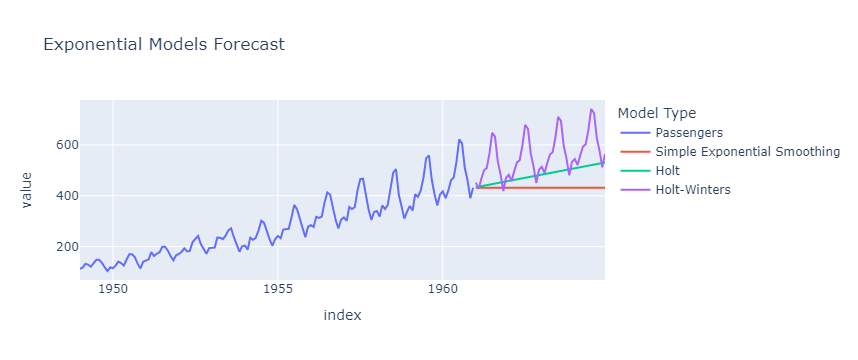

In [ ]:
def holt_winters_forecast(data, horizon, seasonal_periods=12): #!
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=horizon)
    return forecast


df_forecast_exponential['Holt-Winters'] = holt_winters_forecast(data, horizon, seasonal_periods=12)

fig = pd.concat([df_passengers, df_forecast_exponential]).plot(title='Exponential Models Forecast')
fig = fig.update_layout(legend_title_text='Model Type')
fig

## All together

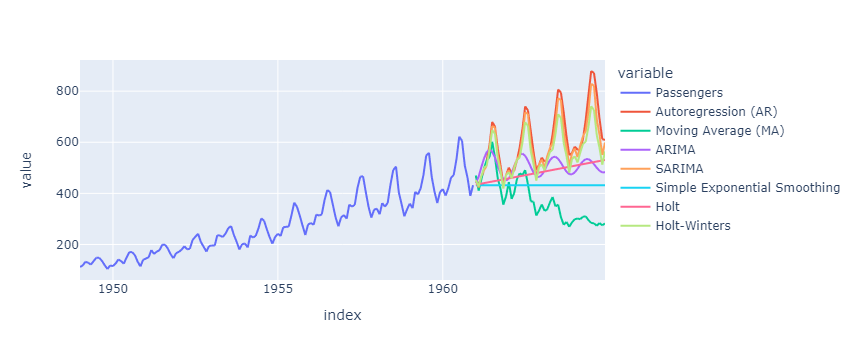

In [ ]:
list_df = [df_forecast_arima_components, df_forecast_arima, df_forecast_exponential] #!
list_df = [df.drop(columns='Passengers') for df in list_df]

df_forecast = pd.concat(list_df, axis=1)
df_forecast = pd.concat([df_passengers, df_forecast], axis=1)

df_forecast.plot()